In [2]:
import numpy as np  # 引入numpy、pandas库
import pandas as pd
from dbfread import DBF
from pandas import DataFrame
import matplotlib.pyplot as plt
import proplot as plot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from IPython.display import display
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # 刻度格式
import matplotlib.ticker as mticker  # 添加网格线
import math
from matplotlib import patches
import os
from matplotlib import font_manager as fm, rcParams

pd.options.display.max_columns = None

In [ ]:
path = "./dataset/SI.dbf"
df_raw = pd.DataFrame(iter(DBF(path)))

In [67]:
path1 = "./dataset/SP.dbf"
df_raw1 = pd.DataFrame(iter(DBF(path1)))

In [ ]:
df_raw

In [4]:
df = df_raw[(df_raw['USA_STATUS'] != "EX") 
            & (df_raw['USA_STATUS'] != "SS") 
            & (df_raw['USA_STATUS'] != "PT") 
            & (df_raw['USA_STATUS'] != "IN")
            & (df_raw['USA_STATUS'] != "DS") 
            & (df_raw['USA_STATUS'] != "WV")
            & (df_raw['USA_STATUS'] != "ET") 
            & (df_raw['USA_STATUS'] != "MD") 
            & (df_raw['USA_STATUS'] != "XX")]# 去掉表格属性USA_STATUS为EX的数据

df = df[df['DIST2LAND'] > 0] # 去掉陆地点

In [68]:
df1 = df_raw1[(df_raw1['USA_STATUS'] != "EX") 
            & (df_raw1['USA_STATUS'] != "SS") 
            & (df_raw1['USA_STATUS'] != "PT") 
            & (df_raw1['USA_STATUS'] != "IN")
            & (df_raw1['USA_STATUS'] != "DS") 
            & (df_raw1['USA_STATUS'] != "WV")
            & (df_raw1['USA_STATUS'] != "ET") 
            & (df_raw1['USA_STATUS'] != "MD") 
            & (df_raw1['USA_STATUS'] != "XX")]# 去掉表格属性USA_STATUS为EX的数据

df1 = df1[df1['DIST2LAND'] > 0] # 去掉陆地点

In [5]:
def filter_indesity(df_, year, indensity):
    """
    df:
    int year: year
    indensity: 台风大小
    return 返回满足年份year台风大小大于34的台风编号列表 以及最小台风大小
    """
    df_year = df_[df_['year'] == year]
    Typh_times = df_year['NUMBER'].value_counts().sort_index().reset_index() # 每个台风出现的次数
    Typh_times.rename(columns={'NUMBER': 'times'})
    ls_num_indensity = []
    ls_min = []
    ls_max = []
    for typh_num in Typh_times['index']:
        df_typh_num = df_year[df_year['NUMBER'] == typh_num]
        typh_num_max = df_typh_num['USA_WIND'].max()
    #     print("The No. %d maxium is %.2f" %(typh_num, typh_num_max))
        if math.isnan(typh_num_max) is False:
            if typh_num_max > indensity:
                ls_wind_indesity = list(df_typh_num['USA_WIND'])
                length_indesity = len(ls_wind_indesity)
                typh_num_min = df_typh_num['USA_WIND'].min()
                df_indesity_min = df_typh_num[df_typh_num['USA_WIND'] == typh_num_min]
                min_times = df_indesity_min['USA_WIND'].value_counts()
                min_times = min_times[int(typh_num_min)]
                ls_num_indensity.append(typh_num)
                ls_min.append(typh_num_min) 
                ls_max.append(typh_num_max)

    return ls_num_indensity, ls_min, ls_max

def filter_min_and_max(df_, year, num):
    """
    int TpyhoneNomber:  num
    return 返回当前year年份的编号为num的最小台风数据和最大台风数据 dataframe
    """
    df_year = df_[df_['year'] == year]
    df_typh_num = df_year[df_year['NUMBER'] == num]
    typh_num_max = df_typh_num['USA_WIND'].max() # 查找最大值
#     print("The No. %d maxium is %.2f" %(typh_num, typh_num_max))

    ls_wind_indesity = list(df_typh_num['USA_WIND']) #列出台风风速的列表
    # length_indesity = len(ls_wind_indesity)  # 求长度
    typh_num_min = df_typh_num['USA_WIND'].min() # 找出最小台风风速

    df_indesity_min = df_typh_num[df_typh_num['USA_WIND'] == typh_num_min] # 设置最小台风风速的dataframe结构
    # min_counts = df_indesity_min['USA_WIND'].value_counts() #计算最小值出现了多少次
    # min_counts[int(typh_num_min)]
    # df_indesity_min[:1]

    df_indesity_max = df_typh_num[df_typh_num['USA_WIND'] == typh_num_max] # 设置最大台风风速的dataframe结构
    return df_indesity_min, df_indesity_max


def lat_and_lon_usa_wind_speed(df_, year_list):
    """
    year_list: einino, lanina, neutrual
    返回风速最小值和最大值表格
    """
    df_wind_speed_min = pd.DataFrame(columns=["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"])
    df_wind_speed_max = pd.DataFrame(columns=["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"])

    for year in year_list:
        ls_num_indensity_year, ls_min_year, ls_max_year = filter_indesity(df_, year, 34)
        for number, min_typh in zip(ls_num_indensity_year, ls_min_year):
            df_indesity_min, df_indesity_max = filter_min_and_max(df_, year, number)
            df_wind_speed_min = df_wind_speed_min.append(df_indesity_min[0:1].loc[df_indesity_min['USA_WIND'] == min_typh, ["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"]], ignore_index=True)
        for number, max_typh in zip(ls_num_indensity_year, ls_max_year):
            df_indesity_min, df_indesity_max = filter_min_and_max(df_, year, number)
            df_wind_speed_max = df_wind_speed_max.append(df_indesity_max[0:1].loc[df_indesity_max['USA_WIND'] == max_typh, ["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"]], ignore_index=True)
        
    return df_wind_speed_min, df_wind_speed_max

def basin_wind_speed(df_, basin, year_list):
    """
    返回风速最小值 风速最大值
    """
    df_tmp = df_[df_['BASIN'] == basin]
    df_year_wind_speed_min, df_year_wind_speed_max = lat_and_lon_usa_wind_speed(df_tmp, year_list)
    return df_year_wind_speed_min, df_year_wind_speed_max

def mean_lon_lat(df_):
    """
    返回经纬度的平局值 保留两位小数点
    """
    lon_mean = round(df_["LON"].mean(), 2)
    lat_mean = round(df_["LAT"].mean(), 2)
    return lon_mean, lat_mean

In [94]:
phase1 = [i for i in range(1980,2005)]

phase2 = [i for i in range(2007,2024)]

phase1_sp_min, phase1_sp_max = basin_wind_speed(df1, 'SP', phase1)

phase1_si_min, phase1_si_max = basin_wind_speed(df, 'SI', phase1)

phase2_sp_min, phase2_sp_max = basin_wind_speed(df1, 'SP', phase2)

phase2_si_min, phase2_si_max = basin_wind_speed(df, 'SI', phase2)

In [85]:
def more_than_180(df_, col_name):
    df_[col_name] = df_[col_name].mask(df_[col_name]>180, (df_[col_name]-360))
    return df_[col_name]

def Retangle_point_distance(df_):
    df_LAT = df_.sort_values(by=['LAT']).reset_index(drop=True)

    MIN_num_lat = round(df_LAT.shape[0] * 0.25) - 1
    MAX_num_lat = round(df_LAT.shape[0] * 0.75) - 1
    
    if MIN_num_lat == -1:
        return (0,0), 0, 0
    LAT_DISTANCE = df_LAT["LAT"][MAX_num_lat] - df_LAT["LAT"][MIN_num_lat]

    df_LON = df_.sort_values(by=['LON']).reset_index(drop=True)

    MIN_num_lon = round(df_LON.shape[0] * 0.25) - 1
    MAX_num_lon = round(df_LON.shape[0] * 0.75) - 1

    LON_DISTANCE = df_LON["LON"][MAX_num_lon] - df_LON["LON"][MIN_num_lon]

    y_lat = df_LAT["LAT"][MIN_num_lat]
    x_lon = df_LON["LON"][MIN_num_lon]

    return (x_lon, y_lat), LON_DISTANCE, LAT_DISTANCE

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def figure_points_rectangle(fig, df_wind, color_point, color_rectangle):
    fig.scatter(df_wind['LON'], df_wind['LAT'],
            s=3, c = color_point, marker = 'o', 
            transform=ccrs.PlateCarree())
    lon_more_180 = [
#         df_einino_wind_speed_min_ep, 
#         df_einino_wind_speed_max_ep,
#         df_lanina_wind_speed_min_ep, 
#         df_lanina_wind_speed_max_ep,
#         df_neutrual_wind_speed_min_ep,
#         df_neutrual_wind_speed_max_ep, 
        phase1_sp_max, phase1_si_max]
    # LON超过180度的那些点，规划到小于0中去
    if df_wind is lon_more_180:
        df_wind['LON'] = df_wind['LON'].mask(df_wind['LON']>180, (df_wind['LON']-360))
    # 小于0的数均加上360
    lon_less_360 = [
#         df_einino_wind_speed_min_sp, 
#         df_einino_wind_speed_max_sp,
#         df_lanina_wind_speed_min_sp, 
#         df_lanina_wind_speed_max_sp,
#         df_neutrual_wind_speed_min_sp, 
#         df_neutrual_wind_speed_max_sp, 
        phase1_si_min, phase1_sp_min
                   ]
    if df_wind is lon_less_360:
        df_wind['LON'] = df_wind['LON'].mask(df_wind['LON'] < 0,(df_wind['LON'] + 360))
    (x_min_lon, y_min_lat), LON_DISTANCE_min, LAT_DISTANCE_min = Retangle_point_distance(df_wind)
    
#     print("The %s minium point coorinate is (%.2f, %.2f)."%(namestr(df_wind, globals())[0],x_min_lon, y_min_lat))
#     print("Its quarter of LON distance is %.2f, its quarter of LAT distance is %.2f"%(LON_DISTANCE_min, LAT_DISTANCE_min))
#     print("Its X axis area is [%.2f, %.2f], the Y axis area is [%.2f, %.2f]. \n"%(x_min_lon, 
#                                                                               x_min_lon+ LON_DISTANCE_min, 
#                                                                               y_min_lat, 
#                                                                               y_min_lat+ LAT_DISTANCE_min))
    AREA_quarter = patches.Rectangle((x_min_lon, y_min_lat), LON_DISTANCE_min, LAT_DISTANCE_min, linewidth=2,
                          linestyle = 'dashed', zorder=2, edgecolor=color_rectangle, 
                           facecolor='none', transform=ccrs.PlateCarree())
    fig.add_patch(AREA_quarter)  
    
    ls_area = []
    ls_area.append(namestr(df_wind, globals())[0])
    ls_area.append(round(x_min_lon, 2))
    ls_area.append(round(y_min_lat, 2))
    ls_area.append(round(LON_DISTANCE_min, 2))
    ls_area.append(round(LAT_DISTANCE_min, 2))
    
    return ls_area

In [ ]:
(x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min = Retangle_point_distance(df_einino_wind_speed_min_sp)


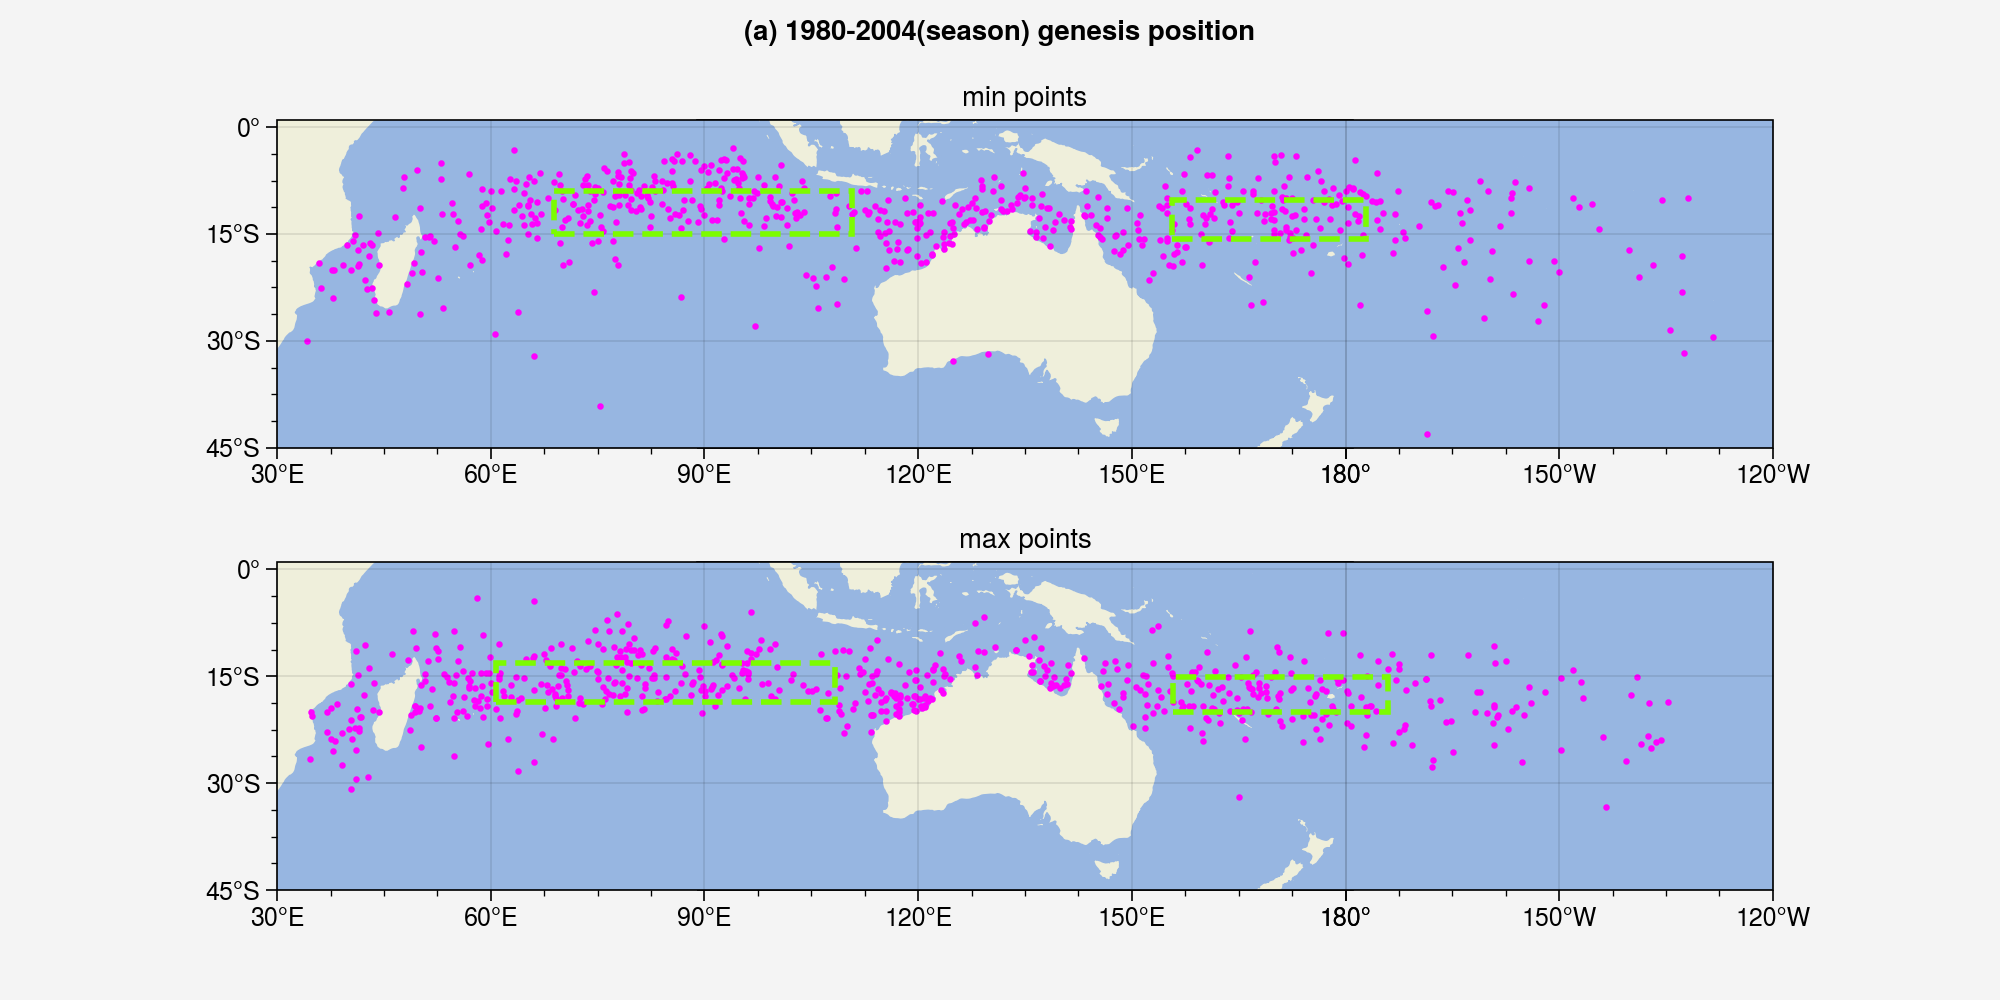

In [82]:
map_proj = ccrs.PlateCarree(central_longitude=180)
# tick_proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(
    nrows=2, ncols=1, 
    figsize=(10, 5),
    subplot_kw={'projection': map_proj}
)


fig.suptitle('(a) 1980-2004(season) genesis position')

ax =fig.add_subplot(2,1,1,projection=map_proj)
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

ax.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_title("min points")

# figure_points_rectangle(ax, phase1_si_min, '#98FB98', '#98FB98')
# figure_points_rectangle(ax, phase1_sp_min, '#00FFFF', '#00FFFF')

###########si
ax.scatter(phase1_si_min['LON'], phase1_si_min['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
phase1_si_min['LON'] = phase1_si_min['LON'].mask(phase1_si_min['LON'] < 0,(phase1_si_min['LON'] + 360))
(x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min = Retangle_point_distance(phase1_si_min)
SP_quarter = patches.Rectangle((x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(SP_quarter)

#####sp
ax.scatter(phase1_sp_min['LON'], phase1_sp_min['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
phase1_sp_min['LON'] = phase1_sp_min['LON'].mask(phase1_sp_min['LON'] < 0,(phase1_sp_min['LON'] + 360))
(x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min = Retangle_point_distance(phase1_sp_min)
SP_quarter = patches.Rectangle((x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(SP_quarter)


# ================ 图2  ================
ax1 =fig.add_subplot(2,1,2,projection=map_proj)
ax1.set_global()
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax1.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax1.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax1.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("max points")

# figure_points_rectangle(ax1, phase1_si_max, '#98FB98', '#98FB98')
# figure_points_rectangle(ax1, phase1_sp_max, '#00FFFF', '#00FFFF')

#######si
ax1.scatter(phase1_si_max['LON'], phase1_si_max['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 找出四分之一的经纬度点 然后算出距离
(x_si_max_lon, y_si_max_lat), LON_DISTANCE_si_max, LAT_DISTANCE_si_max = Retangle_point_distance(phase1_si_max)

SI_quarter_max = patches.Rectangle((x_si_max_lon, y_si_max_lat), LON_DISTANCE_si_max, LAT_DISTANCE_si_max, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax1.add_patch(SI_quarter_max)

######sp
ax1.scatter(phase1_sp_max['LON'], phase1_sp_max['LAT'],
        s=3, c = '#FF00FF', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
phase1_sp_max['LON'] = phase1_sp_max['LON'].mask(phase1_sp_max['LON'] < 0,(phase1_sp_max['LON'] + 360))
(x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min = Retangle_point_distance(phase1_sp_max)
SP_quarter = patches.Rectangle((x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax1.add_patch(SP_quarter)

plt.subplots_adjust(hspace=0.35)

# zhfont1 = matplotlib.font_manager.FontProperties(fname="", size=18)




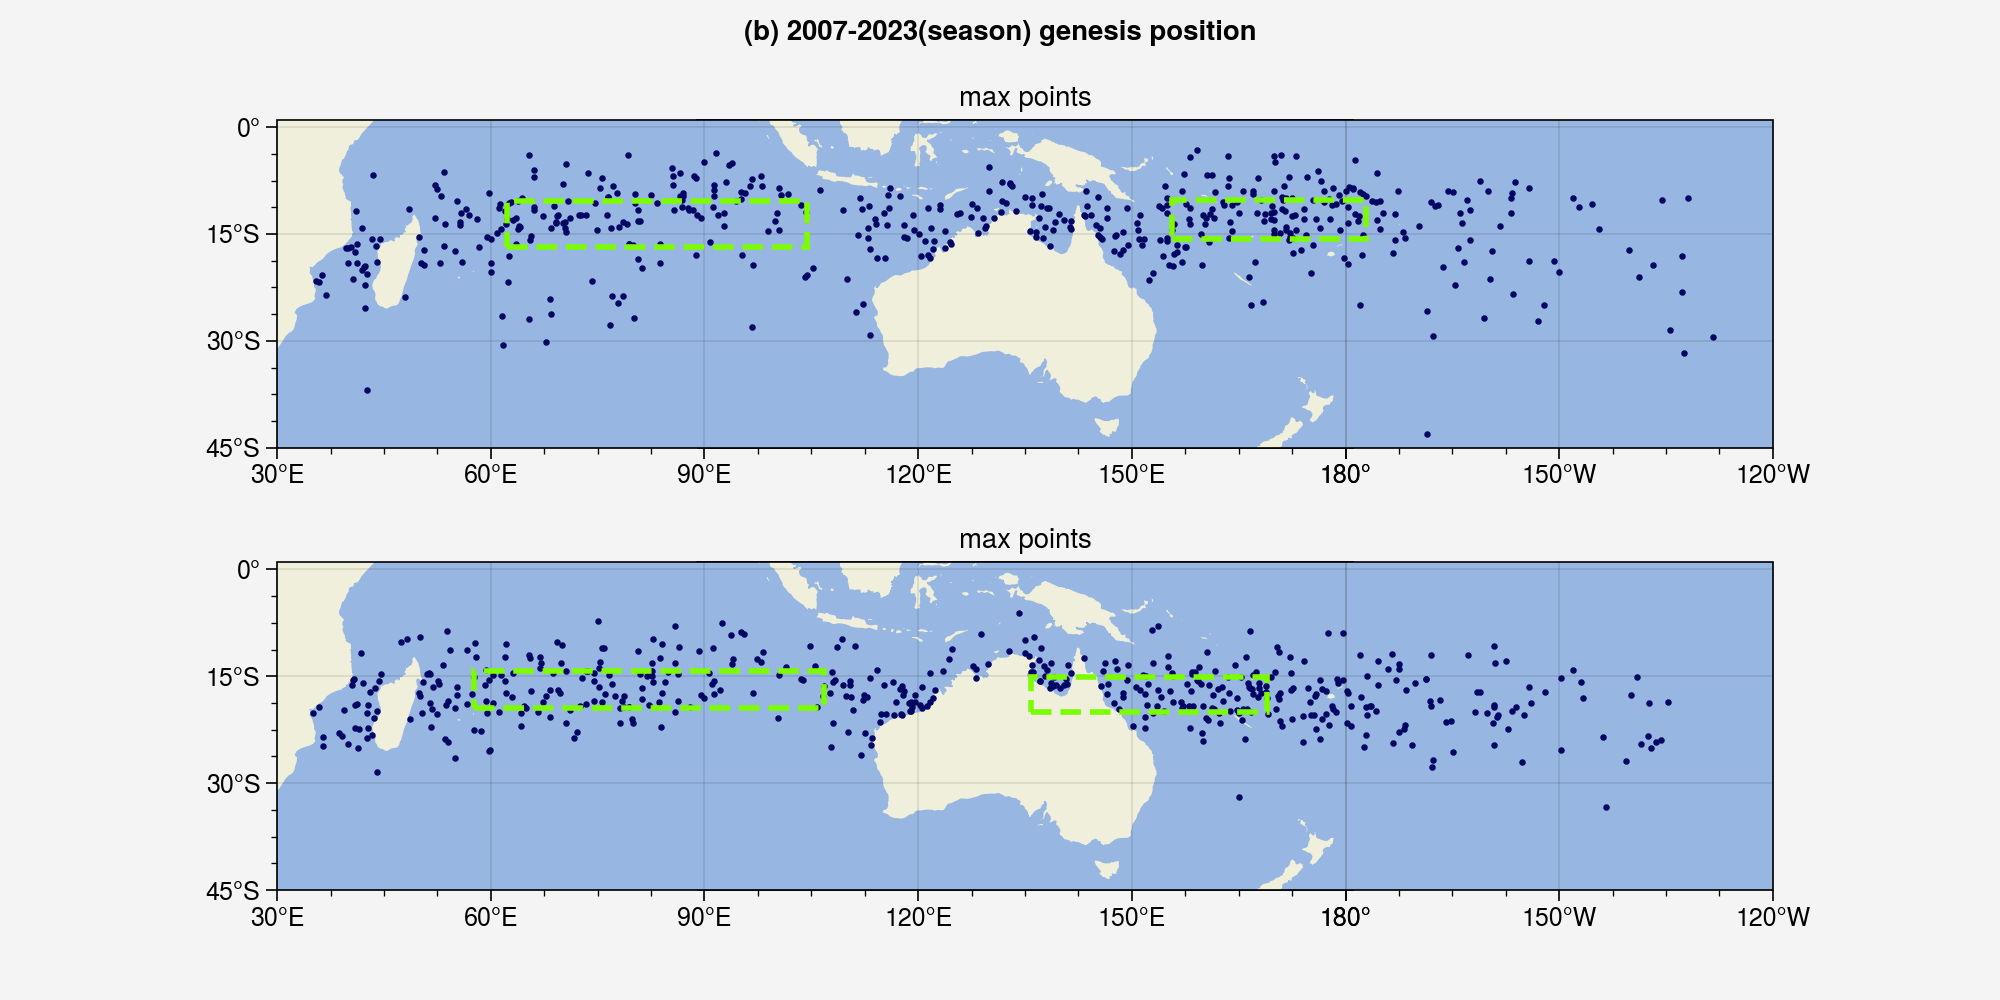

In [83]:
# phase2_sp_min, phase2_sp_max = basin_wind_speed(df, 'SP', phase1)

# phase2_si_min, phase2_si_max = basin_wind_speed(df, 'SI', phase2)

map_proj = ccrs.PlateCarree(central_longitude=180)
# tick_proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 5),
    subplot_kw={'projection': map_proj}
)

fig.suptitle('(b) 2007-2023(season) genesis position')


ax =fig.add_subplot(2,1,1,projection=map_proj)
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

ax.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_title("max points")

# figure_points_rectangle(ax, phase2_si_min, '#98FB98', '#98FB98')
# figure_points_rectangle(ax, phase2_sp_min, '#00FFFF', '#00FFFF')

###########si
ax.scatter(phase2_si_min['LON'], phase2_si_min['LAT'],
        s=3, c = '#030764', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
phase2_si_min['LON'] = phase2_si_min['LON'].mask(phase2_si_min['LON'] < 0,(phase2_si_min['LON'] + 360))
(x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min = Retangle_point_distance(phase2_si_min)
SP_quarter = patches.Rectangle((x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(SP_quarter)

#####sp
ax.scatter(phase2_sp_min['LON'], phase2_sp_min['LAT'],
        s=3, c = '#030764', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
phase2_sp_min['LON'] = phase2_sp_min['LON'].mask(phase2_sp_min['LON'] < 0,(phase2_sp_min['LON'] + 360))
(x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min = Retangle_point_distance(phase2_sp_min)
SP_quarter = patches.Rectangle((x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(SP_quarter)


# ================ 图2  ================
ax1 =fig.add_subplot(2,1,2,projection=map_proj)
ax1.set_global()
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax1.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax1.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax1.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("max points")

# figure_points_rectangle(ax1, phase2_si_max, '#98FB98', '#98FB98')
# figure_points_rectangle(ax1, phase2_sp_max, '#00FFFF', '#00FFFF')

#######si
ax1.scatter(phase2_si_max['LON'], phase2_si_max['LAT'],
        s=3, c = '#030764', marker = 'o', 
        transform=ccrs.PlateCarree())
# 找出四分之一的经纬度点 然后算出距离
(x_si_max_lon, y_si_max_lat), LON_DISTANCE_si_max, LAT_DISTANCE_si_max = Retangle_point_distance(phase2_si_max)

SI_quarter_max = patches.Rectangle((x_si_max_lon, y_si_max_lat), LON_DISTANCE_si_max, LAT_DISTANCE_si_max, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax1.add_patch(SI_quarter_max)

######sp
ax1.scatter(phase2_sp_max['LON'], phase2_sp_max['LAT'],
        s=3, c = '#030764', marker = 'o', 
        transform=ccrs.PlateCarree())
# 小于0的数均加上360
phase1_sp_max['LON'] = phase2_sp_max['LON'].mask(phase2_sp_max['LON'] < 0,(phase2_sp_max['LON'] + 360))
(x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min = Retangle_point_distance(phase2_sp_max)
SP_quarter = patches.Rectangle((x_sp_min_lon, y_sp_min_lat), LON_DISTANCE_sp_min, LAT_DISTANCE_sp_min, linewidth=2,
                      linestyle = 'dashed', zorder=2, edgecolor='#7CFC00', 
                       facecolor='none', transform=ccrs.PlateCarree())
ax1.add_patch(SP_quarter)

plt.subplots_adjust(hspace=0.35)


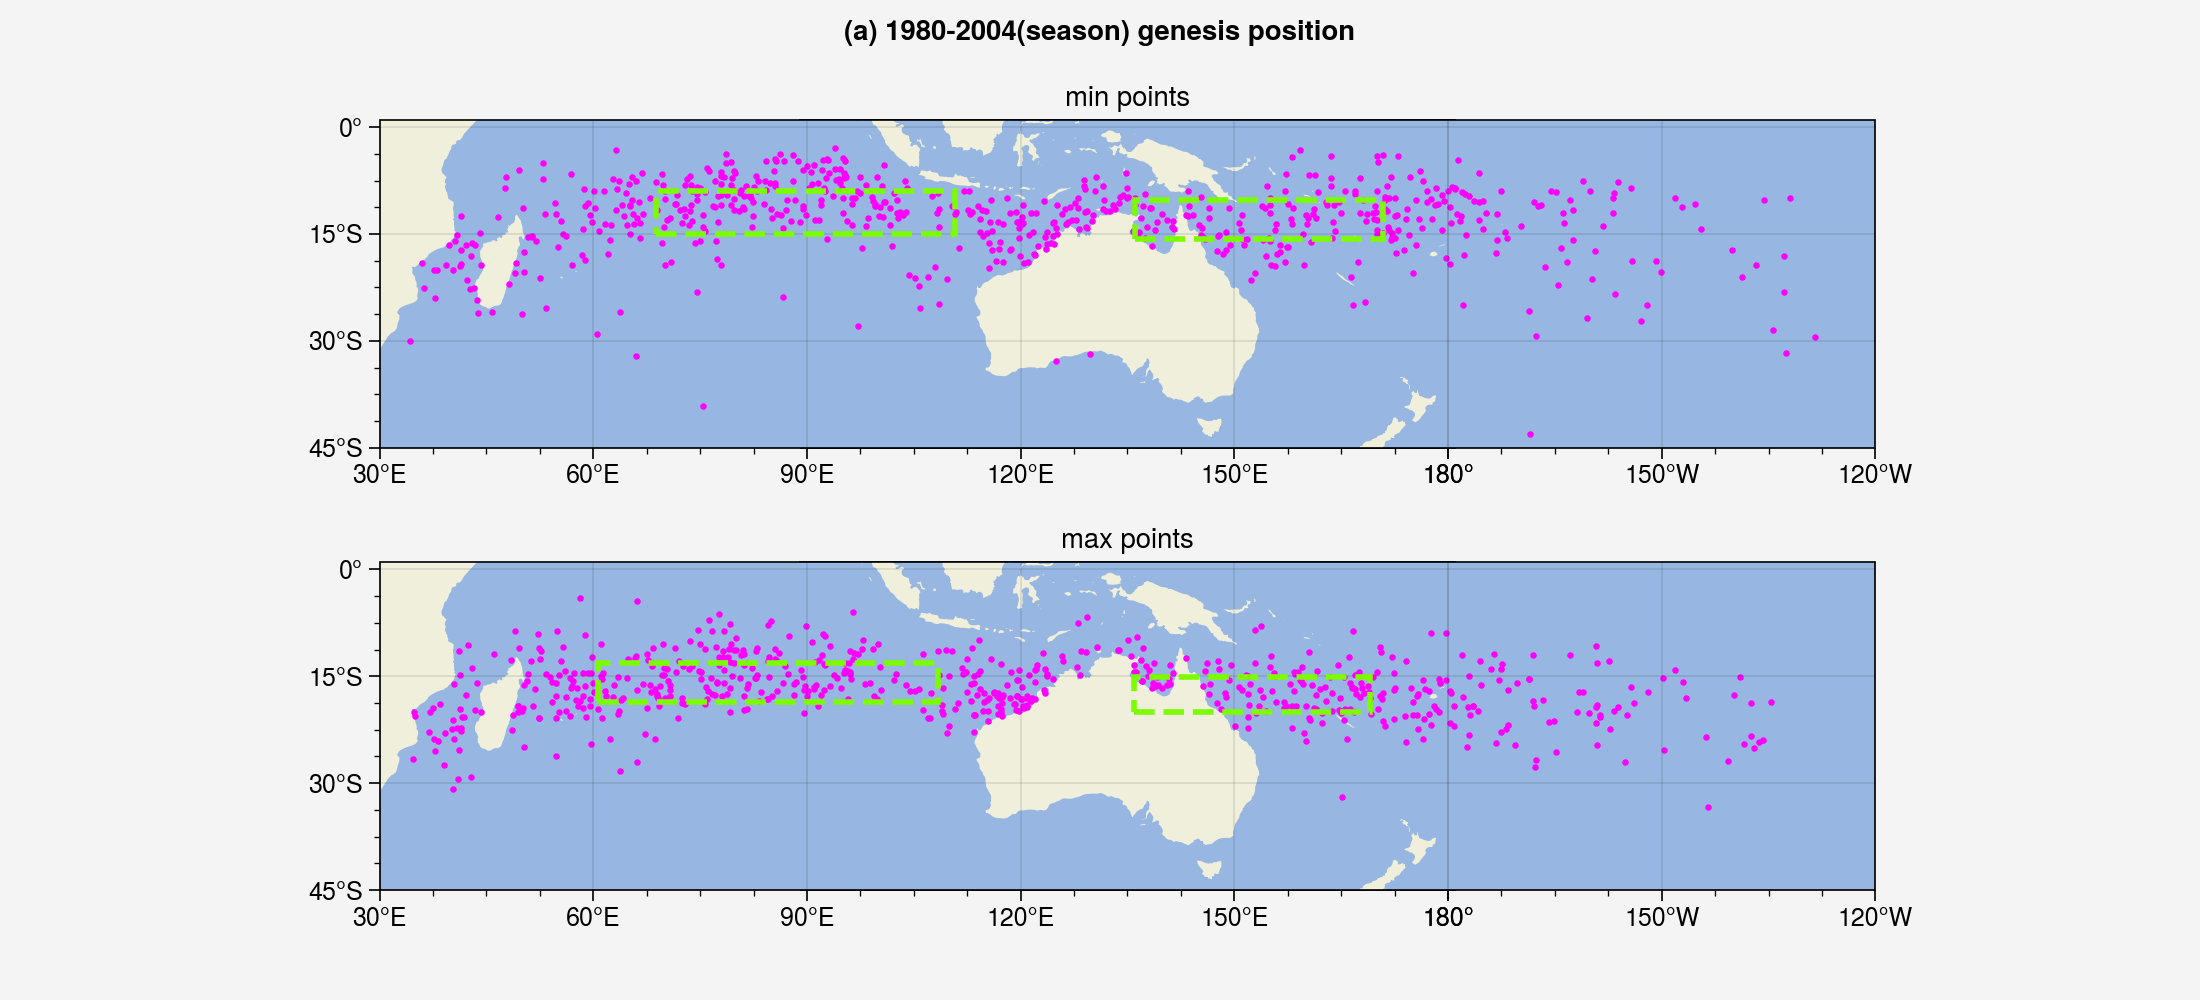

In [95]:
map_proj = ccrs.PlateCarree(central_longitude=180)
# tick_proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(
    nrows=2, ncols=1, 
    figsize=(11, 5),
    subplot_kw={'projection': map_proj}
)


fig.suptitle('(a) 1980-2004(season) genesis position')

ax =fig.add_subplot(2,1,1,projection=map_proj)
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

ax.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_title("min points")

figure_points_rectangle(ax, phase1_si_min, '#FF00FF', '#7CFC00')
figure_points_rectangle(ax, phase1_sp_min, '#FF00FF', '#7CFC00')


ax1 =fig.add_subplot(2,1,2,projection=map_proj)
ax1.set_global()
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax1.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax1.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax1.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("max points")
figure_points_rectangle(ax1, phase1_si_max, '#FF00FF', '#7CFC00')
figure_points_rectangle(ax1, phase1_sp_max, '#FF00FF', '#7CFC00')
plt.subplots_adjust(hspace=0.35)

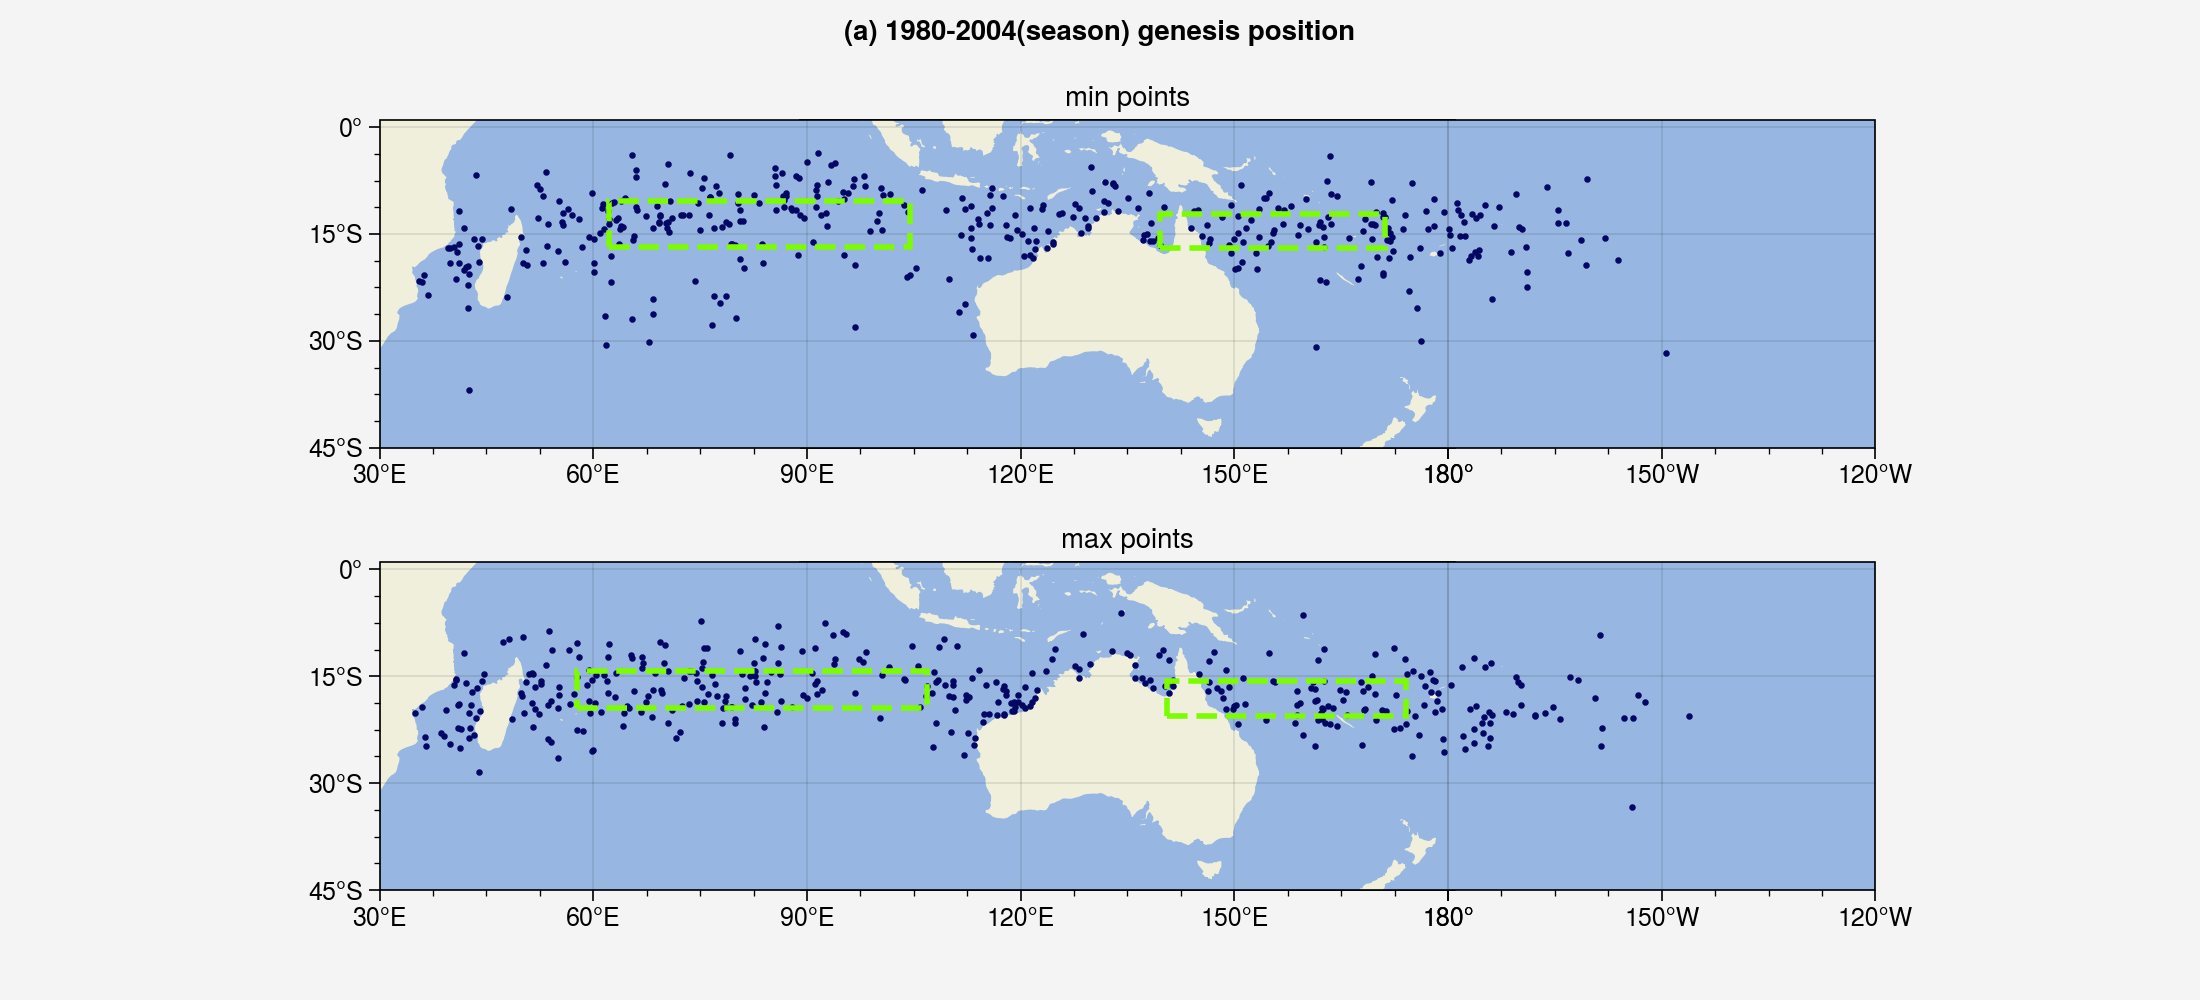

In [96]:
map_proj = ccrs.PlateCarree(central_longitude=180)
# tick_proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(
    nrows=2, ncols=1, 
    figsize=(11, 5),
    subplot_kw={'projection': map_proj}
)


fig.suptitle('(a) 1980-2004(season) genesis position')

ax =fig.add_subplot(2,1,1,projection=map_proj)
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

ax.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_title("min points")

figure_points_rectangle(ax, phase2_si_min, '#030764', '#7CFC00')
figure_points_rectangle(ax, phase2_sp_min, '#030764', '#7CFC00')


ax1 =fig.add_subplot(2,1,2,projection=map_proj)
ax1.set_global()
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.set_extent([30, 180, -45, 1], crs=ccrs.PlateCarree())
xticks_list = np.hstack((np.arange(30,180.1,30) , np.arange(-180,-90.1,30)))
ax1.set_xticks(xticks_list, crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-45, 1, 15), crs=ccrs.PlateCarree())
# ax1.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
# ax1.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("max points")
figure_points_rectangle(ax1, phase2_si_max, '#030764', '#7CFC00')
figure_points_rectangle(ax1, phase2_sp_max, '#030764', '#7CFC00')
plt.subplots_adjust(hspace=0.35)